In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
train_images.shape


(60000, 28, 28)

In [0]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

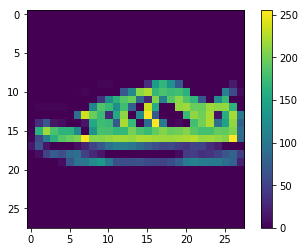

In [0]:
plt.figure()
plt.imshow(train_images[5500])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [0]:
train_images.shape

(60000, 28, 28)

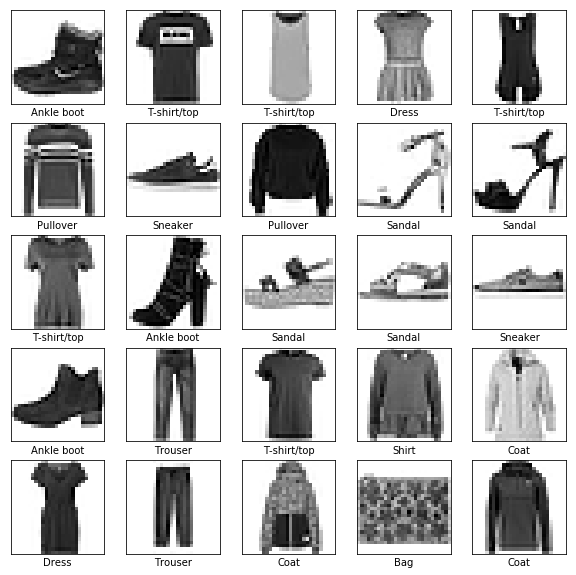

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(train_images, train_labels, epochs=50)


Epoch 1/50
60000/60000 [==============================] - 10s 165us/sample - loss: 0.5034 - acc: 0.8228
Epoch 2/50
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3772 - acc: 0.8653
Epoch 3/50
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3371 - acc: 0.8759
Epoch 4/50
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3139 - acc: 0.8849
Epoch 5/50
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2970 - acc: 0.8906
Epoch 6/50
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2813 - acc: 0.8965
Epoch 7/50
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2694 - acc: 0.8997
Epoch 8/50
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2585 - acc: 0.9040
Epoch 9/50
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2488 - acc: 0.9085
Epoch 10/50
60000/60000 [==============================] - 8s 136us/samp

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 42us/sample - loss: 0.4802 - acc: 0.8875
Test accuracy: 0.8875


In [0]:
predictions = model.predict(test_images)


In [0]:
predictions[0]

array([2.0203895e-21, 7.2475592e-13, 1.0523363e-26, 8.7322114e-24,
       7.3114444e-16, 8.2995426e-14, 2.5778436e-15, 7.2227795e-06,
       8.6449776e-16, 9.9999273e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])


9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


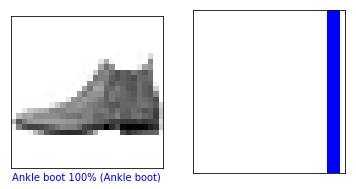

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


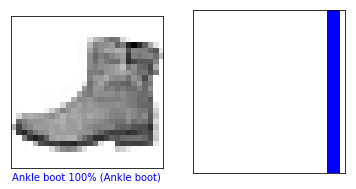

In [0]:
i = 2135
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


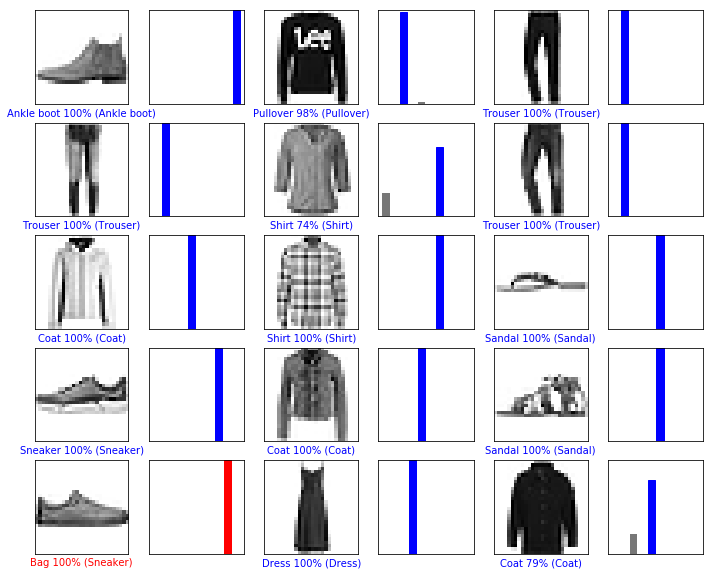

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
